## Dataset 1

In [55]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pycountry

In [35]:
ds1 = load_dataset("marcelomoreno26/geoguessr")

In [4]:
ds1

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 25160
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 5372
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 5445
    })
})

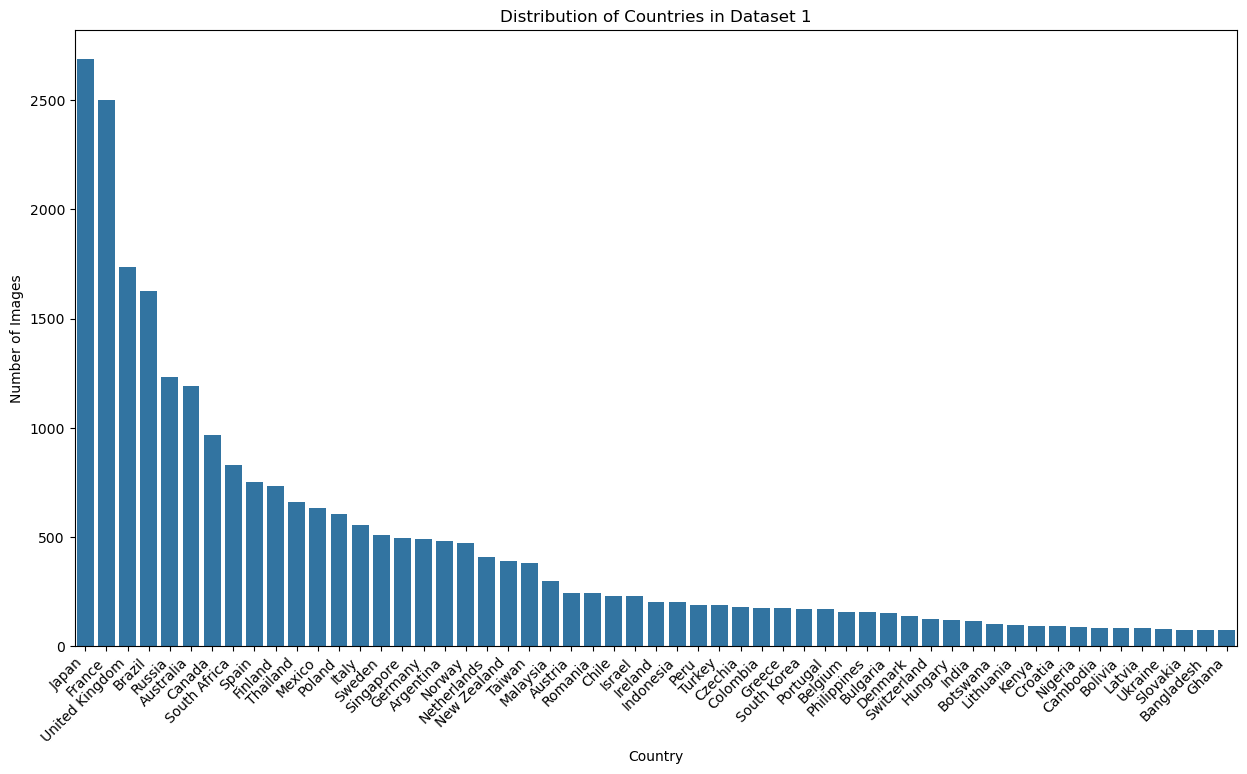

In [36]:
country_counts1 = Counter(ds1['train']['label'])
country_counts1

# Create a bar plot in descending order
plt.figure(figsize=(15, 8))
sns.barplot(x=list(country_counts1.keys()), y=list(country_counts1.values()), order=sorted(country_counts1, key=lambda x: country_counts1[x], reverse=True))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Countries in Dataset 1')
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.show()


## Dataset 2

In [37]:
ds2 = load_dataset("stochastic/random_streetview_images_pano_v0.0.2")

In [39]:
ds2

DatasetDict({
    train: Dataset({
        features: ['image', 'country_iso_alpha2', 'latitude', 'longitude', 'address'],
        num_rows: 11054
    })
})

In [42]:
def iso2_to_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

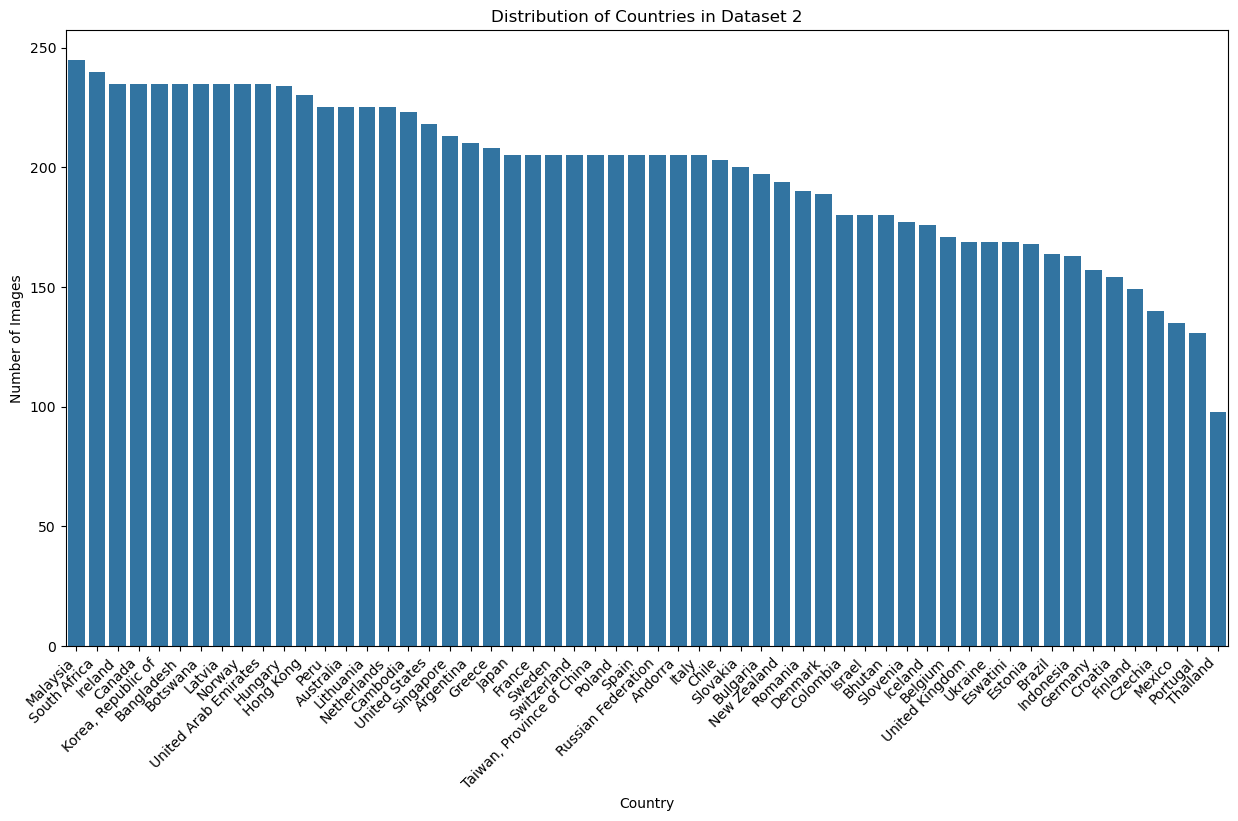

In [48]:
country_counts2 = Counter([iso2_to_name(code) for code in ds2['train']['country_iso_alpha2']])
country_counts2

# Create a bar plot in descending order
plt.figure(figsize=(15, 8))
sns.barplot(x=list((country_counts2.keys())), y=list(country_counts2.values()), order=sorted(country_counts2, key=lambda x: country_counts2[x], reverse=True))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Countries in Dataset 2')
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.show()


## Merged

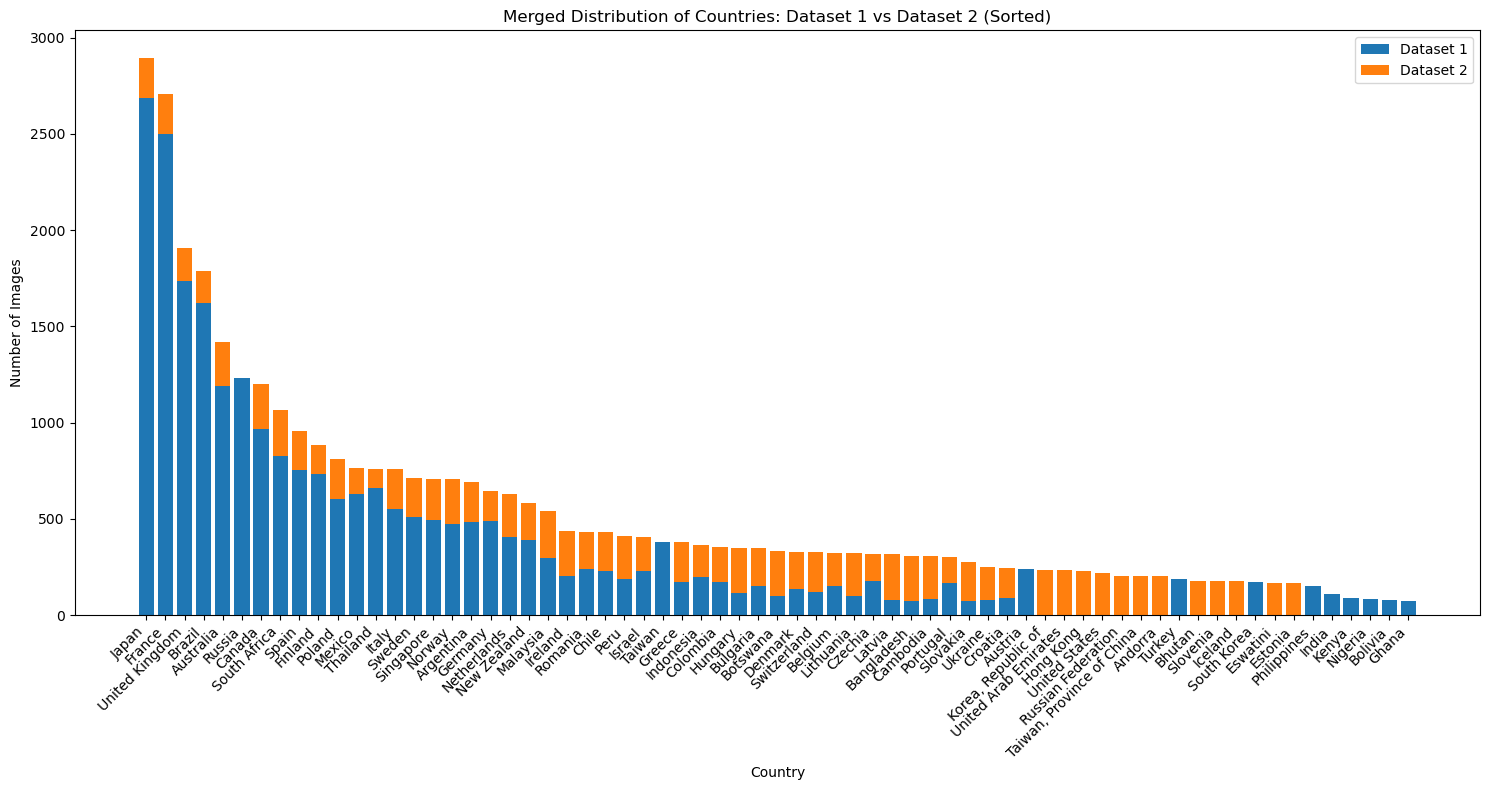

In [59]:
# Build a combined DataFrame
all_countries = sorted(set(country_counts1.keys()) | set(country_counts2.keys()))
data = {
    'Dataset 1': [country_counts1.get(c, 0) for c in all_countries],
    'Dataset 2': [country_counts2.get(c, 0) for c in all_countries]
}
df = pd.DataFrame(data, index=all_countries)
df['Total'] = df['Dataset 1'] + df['Dataset 2']

# Sort by total descending
df_sorted = df.sort_values(by='Total', ascending=False)

# Plot stacked bar chart
labels = df_sorted.index.tolist()
x = np.arange(len(labels))
ds1_vals = df_sorted['Dataset 1'].values
ds2_vals = df_sorted['Dataset 2'].values

plt.figure(figsize=(15, 8))
plt.bar(x, ds1_vals, label='Dataset 1', color='#1f77b4')
plt.bar(x, ds2_vals, bottom=ds1_vals, label='Dataset 2', color='#ff7f0e')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.title('Merged Distribution of Countries: Dataset 1 vs Dataset 2 (Sorted)')
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()